# Data_Science_Assignment

# Background	
The Customer Data tab contains the data for your assignment	

The data is at a customer level (doctor data) and contains the following information: 	
* Customer Demographic information
* Promotional activity targeted at the customer (emails, calls, faxes). 
* Calls refers to the tele-marketing calls made to doctors (columns H and I); Emails refers to promotional emails (columns J & K) and Faxes refers to promotional material faxed to doctors (col L)
* Sales data by the customer (Brand 1, Brand 2, Branded Market and Total Market)
* Brand 1 is pharma Company's brand for which promotional activity has been performed	
* Brand 2 is a key competitor of Brand 1	
* Total Branded Market contains sales of Brand 1, Brand 2 and some other brands	
* Total Market (Branded + Unbranded) Sales contains sales of Total Branded Market and Unbranded Market products	


# Business Problem:
Using Exploratory Data Analysis, show your understanding of the Brand and Market situation
Build a predictive model that estimates the impact of each channel (i.e. Calls, Emails, Faxes) on Brand 1 sales, for different customer segments based on total market sales(Column P)
Consider columns C to M for building predictive model, considering column M as your target variable


# Instructions:
Use any tool for Exploratory data analysis
Please use Python programming language for developing predictive model
Please share the code and the results of your analysis along with brief explanation of your approach
Based on your analysis, please provide brief insights and recommendations for the Company


## 1. Reading The DATA

In [1]:
import pandas as pd

In [2]:
data=pd.read_excel("Data_Science_Assignment.xlsx",sheetname="Customer_Data", skiprows=2)

C:\Users\Name\Anaconda3\lib\site-packages\pandas\io\excel.py:329: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  **kwds)


In [3]:
data.head(10)

,Unnamed: 0,Customer ID,Title,Specialty Code,Specialty Description,State,Region,Call Attempts,Calls Successfully Completed,Emails Sent,Emails Opened,Faxes Sent,Brand 1 Sales (Company's Brand),Brand 2 Sales (Competitor Brand),Total Branded Market Sales,Total Market (Branded + Unbranded) Sales
0,NaN,IND000001,MD,FM,FAMILY MEDICINE,SC,South Region,1,0,13,6,8,8.0,NaN,27,131
1,NaN,IND000002,MD,CD,CARDIOVASCULAR DISEASES,SC,South Region,1,0,15,8,6,3.0,NaN,40,56
2,NaN,IND000003,MD,IM,INTERNAL MEDICINE,AL,South Region,2,1,4,2,6,7.0,NaN,27,161
3,NaN,IND000004,MD,FM,FAMILY MEDICINE,AL,South Region,0,0,11,9,8,9.0,NaN,39,180
4,NaN,IND000005,MD,CD,CARDIOVASCULAR DISEASES,AL,South Region,5,5,0,0,9,4.0,NaN,14,44
5,NaN,IND000006,MD,END,ENDOCRINOLOGY,AL,South Region,0,0,8,1,9,2.0,NaN,9,36
6,NaN,IND000007,MD,IM,INTERNAL MEDICINE,TN,South Region,2,1,16,9,3,6.0,2.0,26,298
7,NaN,IND000008,MD,FM,FAMILY MEDICINE,TX,South Region,2,0,1,0,9,1.0,2.0,29,31
8,NaN,IND000009,MD,FM,FAMILY MEDICINE,LA,South Region,4,2,4,3,10,11.0,NaN,38,217
9,NaN,IND000010,MD,IM,INTERNAL MEDICINE,AL,South Region,3,2,18,9,6,7.0,3.0,49,227


In [4]:
data1=data.drop(labels="Unnamed: 0",axis=1)

In [5]:
data1.head()

,Customer ID,Title,Specialty Code,Specialty Description,State,Region,Call Attempts,Calls Successfully Completed,Emails Sent,Emails Opened,Faxes Sent,Brand 1 Sales (Company's Brand),Brand 2 Sales (Competitor Brand),Total Branded Market Sales,Total Market (Branded + Unbranded) Sales
0,IND000001,MD,FM,FAMILY MEDICINE,SC,South Region,1,0,13,6,8,8.0,NaN,27,131
1,IND000002,MD,CD,CARDIOVASCULAR DISEASES,SC,South Region,1,0,15,8,6,3.0,NaN,40,56
2,IND000003,MD,IM,INTERNAL MEDICINE,AL,South Region,2,1,4,2,6,7.0,NaN,27,161
3,IND000004,MD,FM,FAMILY MEDICINE,AL,South Region,0,0,11,9,8,9.0,NaN,39,180
4,IND000005,MD,CD,CARDIOVASCULAR DISEASES,AL,South Region,5,5,0,0,9,4.0,NaN,14,44


##### data reading:
* Here we can see the data is in excel formate.
* And clear seen there is no use of top 2 heads so i use the skiprows=2.
* I removed the Unnamed:0.

In [6]:
print(data1.columns)

Index(['Customer ID', 'Title', 'Specialty Code', 'Specialty Description',
       'State', 'Region', 'Call Attempts', 'Calls Successfully Completed',
       'Emails Sent', 'Emails Opened', 'Faxes Sent',
       'Brand 1 Sales (Company's Brand)', 'Brand 2 Sales (Competitor Brand)',
       'Total Branded Market Sales',
       'Total Market (Branded + Unbranded) Sales'],
      dtype='object')


In [7]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77641 entries, 0 to 77640
Data columns (total 15 columns):
Customer ID                                 77641 non-null object
Title                                       77641 non-null object
Specialty Code                              77641 non-null object
Specialty Description                       77641 non-null object
State                                       77641 non-null object
Region                                      76280 non-null object
Call Attempts                               77641 non-null int64
Calls Successfully Completed                77641 non-null int64
Emails Sent                                 77641 non-null int64
Emails Opened                               77641 non-null int64
Faxes Sent                                  77641 non-null int64
Brand 1 Sales (Company's Brand)             77589 non-null float64
Brand 2 Sales (Competitor Brand)            33846 non-null float64
Total Branded Market Sales          

In [8]:
data1.dtypes

Customer ID                                  object
Title                                        object
Specialty Code                               object
Specialty Description                        object
State                                        object
Region                                       object
Call Attempts                                 int64
Calls Successfully Completed                  int64
Emails Sent                                   int64
Emails Opened                                 int64
Faxes Sent                                    int64
Brand 1 Sales (Company's Brand)             float64
Brand 2 Sales (Competitor Brand)            float64
Total Branded Market Sales                    int64
Total Market (Branded + Unbranded) Sales      int64
dtype: object

In [9]:
data1.isnull().sum()

Customer ID                                     0
Title                                           0
Specialty Code                                  0
Specialty Description                           0
State                                           0
Region                                       1361
Call Attempts                                   0
Calls Successfully Completed                    0
Emails Sent                                     0
Emails Opened                                   0
Faxes Sent                                      0
Brand 1 Sales (Company's Brand)                52
Brand 2 Sales (Competitor Brand)            43795
Total Branded Market Sales                      0
Total Market (Branded + Unbranded) Sales        0
dtype: int64

In [10]:
## checking if there any null values
round((data1.isnull().sum()/len(data))*100,3)

Customer ID                                  0.000
Title                                        0.000
Specialty Code                               0.000
Specialty Description                        0.000
State                                        0.000
Region                                       1.753
Call Attempts                                0.000
Calls Successfully Completed                 0.000
Emails Sent                                  0.000
Emails Opened                                0.000
Faxes Sent                                   0.000
Brand 1 Sales (Company's Brand)              0.067
Brand 2 Sales (Competitor Brand)            56.407
Total Branded Market Sales                   0.000
Total Market (Branded + Unbranded) Sales     0.000
dtype: float64

# 2. Data exploration

In [11]:
import numpy as np

In [12]:
def missing_data(data1):
    total = data1.isnull().sum()
    percent = (data1.isnull().sum()/data1.isnull().count()*100)
    tt = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    types = []
    for col in data1.columns:
        dtype = str(data1[col].dtype)
        types.append(dtype)
    tt['Types'] = types
    return(np.transpose(tt))

In [13]:

%%time
missing_data(data1)

Wall time: 321 ms


,Customer ID,Title,Specialty Code,Specialty Description,State,Region,Call Attempts,Calls Successfully Completed,Emails Sent,Emails Opened,Faxes Sent,Brand 1 Sales (Company's Brand),Brand 2 Sales (Competitor Brand),Total Branded Market Sales,Total Market (Branded + Unbranded) Sales
Total,0,0,0,0,0,1361,0,0,0,0,0,52,43795,0,0
Percent,0,0,0,0,0,1.75294,0,0,0,0,0,0.0669749,56.4071,0,0
Types,object,object,object,object,object,object,int64,int64,int64,int64,int64,float64,float64,int64,int64


In [14]:
%%time
data1.describe()

Wall time: 231 ms


,Call Attempts,Calls Successfully Completed,Emails Sent,Emails Opened,Faxes Sent,Brand 1 Sales (Company's Brand),Brand 2 Sales (Competitor Brand),Total Branded Market Sales,Total Market (Branded + Unbranded) Sales
count,77641.000000,77641.000000,77641.000000,77641.000000,77641.000000,77589.000000,33846.000000,77641.000000,77641.000000
mean,2.497096,1.412437,9.985150,5.941732,5.508636,4.770019,1.658719,30.527209,77.805116
std,1.706586,1.524812,6.026626,5.561027,2.871542,2.672652,4.148801,15.235257,95.908356
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,1.000000,0.000000,5.000000,0.000000,3.000000,3.000000,0.000000,18.000000,24.000000
50%,2.000000,1.000000,10.000000,5.000000,6.000000,5.000000,1.000000,31.000000,50.000000
75%,4.000000,2.000000,15.000000,10.000000,8.000000,6.000000,2.000000,43.000000,97.000000
max,5.000000,5.000000,20.000000,20.000000,10.000000,70.000000,370.000000,397.000000,3119.000000


Now, you can check that we have fill all missing values.

Now We are going to check duplicate values and remove them

In [15]:
print("Duplicate Values : ",data1.duplicated().sum())

Duplicate Values :  0


In [16]:
# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()

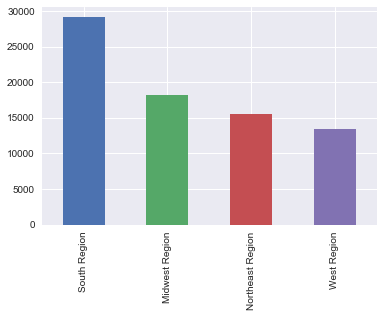

In [17]:
data1['Region'].value_counts().head(10).plot.bar()

##### Bar charts and categorical data:


In [18]:
data1["Specialty Code"].value_counts().head()

FM     28502
IM     21892
UNK    11523
CD      5794
END     1977
Name: Specialty Code, dtype: int64

In [19]:
data1["Region"].value_counts().head()

South Region        29112
Midwest Region      18201
Northeast Region    15566
West Region         13401
Name: Region, dtype: int64

In [20]:
# Import libraries
import pandas as pd
import folium
legend_name='Total Branded Market Sales(%)'

In [21]:
m = folium.Map(location=[37, -102], zoom_start=5)


In [22]:
# Add the color for the chloropleth:
m.choropleth(
 geo_data=data1,
 name='choropleth',
 data=data1,
 columns=['Region', 'Total Branded Market Sales'],
 key_on='Customer ID',
 fill_color='YlGn',
 fill_opacity=0.7,
 line_opacity=0.5,
)
folium.LayerControl().add_to(m)


ValueError: Unhandled object       Customer ID Title Specialty Code    Specialty Description State  \
0       IND000001    MD             FM          FAMILY MEDICINE    SC   
1       IND000002    MD             CD  CARDIOVASCULAR DISEASES    SC   
2       IND000003    MD             IM        INTERNAL MEDICINE    AL   
3       IND000004    MD             FM          FAMILY MEDICINE    AL   
4       IND000005    MD             CD  CARDIOVASCULAR DISEASES    AL   
5       IND000006    MD            END            ENDOCRINOLOGY    AL   
6       IND000007    MD             IM        INTERNAL MEDICINE    TN   
7       IND000008    MD             FM          FAMILY MEDICINE    TX   
8       IND000009    MD             FM          FAMILY MEDICINE    LA   
9       IND000010    MD             IM        INTERNAL MEDICINE    AL   
10      IND000011    MD             FM          FAMILY MEDICINE    AL   
11      IND000012    MD             FM          FAMILY MEDICINE    AL   
12      IND000013    MD              D              DERMATOLOGY    AL   
13      IND000014    MD             FM          FAMILY MEDICINE    AL   
14      IND000015    MD             FM          FAMILY MEDICINE    AL   
15      IND000016    MD             TS         THORACIC SURGERY    AL   
16      IND000017    MD             CD  CARDIOVASCULAR DISEASES    MA   
17      IND000018    MD             FM          FAMILY MEDICINE    FL   
18      IND000019    MD             FM          FAMILY MEDICINE    AL   
19      IND000020    MD             IM        INTERNAL MEDICINE    AL   
20      IND000021    MD             FM          FAMILY MEDICINE    AL   
21      IND000022    MD             IM        INTERNAL MEDICINE    AL   
22      IND000023    MD             FM          FAMILY MEDICINE    IA   
23      IND000024    MD             CD  CARDIOVASCULAR DISEASES    AL   
24      IND000025    MD             IM        INTERNAL MEDICINE    VA   
25      IND000026    MD             FM          FAMILY MEDICINE    AL   
26      IND000027    MD             FM          FAMILY MEDICINE    GA   
27      IND000028    MD             FM          FAMILY MEDICINE    AL   
28      IND000029    MD             IM        INTERNAL MEDICINE    AL   
29      IND000030    MD             HO      HEMATOLOGY/ONCOLOGY    MS   
...           ...   ...            ...                      ...   ...   
77611   IND077612    NP            UNK                  UNKNOWN    NY   
77612   IND077613    NP            UNK                  UNKNOWN    CA   
77613   IND077614   MSN            UNK                  UNKNOWN    OR   
77614   IND077615   PAC            UNK                  UNKNOWN    PA   
77615   IND077616   PAC            UNK                  UNKNOWN    IA   
77616   IND077617   APR            UNK                  UNKNOWN    CT   
77617   IND077618    NP            UNK                  UNKNOWN    TX   
77618   IND077619   FNP            UNK                  UNKNOWN    TX   
77619   IND077620   PAC            UNK                  UNKNOWN    NE   
77620   IND077621    NP            UNK                  UNKNOWN    AZ   
77621   IND077622   PAC            UNK                  UNKNOWN    NY   
77622   IND077623   PAC            UNK                  UNKNOWN    IA   
77623   IND077624   APN            UNK                  UNKNOWN    NJ   
77624   IND077625   APN            UNK                  UNKNOWN    NJ   
77625   IND077626    NP            UNK                  UNKNOWN    CO   
77626   IND077627    NP            UNK                  UNKNOWN    MI   
77627   IND077628    PA            UNK                  UNKNOWN    MI   
77628   IND077629    PA            UNK                  UNKNOWN    MI   
77629   IND077630   MSN            UNK                  UNKNOWN    NC   
77630   IND077631   APR            UNK                  UNKNOWN    TN   
77631   IND077632   APR            UNK                  UNKNOWN    CT   
77632   IND077633   PAC            UNK                  UNKNOWN    NC   
77633   IND077634   CNP            UNK                  UNKNOWN    OH   
77634   IND077635    PA            UNK                  UNKNOWN    PA   
77635   IND077636   DNP            UNK                  UNKNOWN    CA   
77636   IND077637   PAC            UNK                  UNKNOWN    PA   
77637   IND077638    MS            UNK                  UNKNOWN    NY   
77638   IND077639   MSN            UNK                  UNKNOWN    CA   
77639   IND077640    NP            UNK                  UNKNOWN    TX   
77640   IND077641    PA            UNK                  UNKNOWN    NY   

                 Region  Call Attempts  Calls Successfully Completed  \
0          South Region              1                             0   
1          South Region              1                             0   
2          South Region              2                             1   
3          South Region              0                             0   
4          South Region              5                             5   
5          South Region              0                             0   
6          South Region              2                             1   
7          South Region              2                             0   
8          South Region              4                             2   
9          South Region              3                             2   
10         South Region              4                             2   
11         South Region              4                             2   
12         South Region              1                             0   
13         South Region              0                             0   
14         South Region              0                             0   
15         South Region              3                             2   
16     Northeast Region              4                             4   
17         South Region              3                             3   
18         South Region              3                             3   
19         South Region              5                             4   
20         South Region              4                             2   
21         South Region              0                             0   
22       Midwest Region              4                             2   
23         South Region              3                             3   
24         South Region              3                             2   
25         South Region              5                             2   
26         South Region              5                             2   
27         South Region              5                             4   
28         South Region              5                             4   
29         South Region              4                             1   
...                 ...            ...                           ...   
77611  Northeast Region              5                             2   
77612       West Region              1                             1   
77613       West Region              1                             0   
77614  Northeast Region              3                             0   
77615    Midwest Region              3                             0   
77616  Northeast Region              4                             2   
77617      South Region              1                             1   
77618      South Region              4                             2   
77619    Midwest Region              0                             0   
77620       West Region              4                             2   
77621  Northeast Region              2                             0   
77622    Midwest Region              0                             0   
77623  Northeast Region              0                             0   
77624  Northeast Region              5                             5   
77625       West Region              5                             2   
77626    Midwest Region              5                             2   
77627    Midwest Region              2                             0   
77628    Midwest Region              4                             2   
77629      South Region              1                             0   
77630      South Region              5                             3   
77631  Northeast Region              1                             1   
77632      South Region              0                             0   
77633    Midwest Region              1                             0   
77634  Northeast Region              5                             2   
77635       West Region              5                             5   
77636  Northeast Region              0                             0   
77637  Northeast Region              0                             0   
77638       West Region              5                             2   
77639      South Region              3                             3   
77640  Northeast Region              0                             0   

       Emails Sent  Emails Opened  Faxes Sent  \
0               13              6           8   
1               15              8           6   
2                4              2           6   
3               11              9           8   
4                0              0           9   
5                8              1           9   
6               16              9           3   
7                1              0           9   
8                4              3          10   
9               18              9           6   
10              10              1           1   
11               7              2           4   
12               2              0           7   
13              20             11           2   
14               3              0          10   
15              14              8           5   
16              12              3           4   
17               1              0           2   
18               9              8          10   
19              15              5           6   
20               9              6           6   
21              13             11           9   
22              10             10           4   
23               4              0           1   
24              12              4           3   
25               0              0           9   
26              18              8           1   
27              15              8           1   
28              20             20           6   
29               2              0          10   
...            ...            ...         ...   
77611            5              1           5   
77612           12              4           4   
77613           18             11           4   
77614           13              5           1   
77615            1              0           7   
77616            5              4          10   
77617           12              8          10   
77618           12              2           7   
77619            1              0           2   
77620            4              0           7   
77621            5              0           6   
77622           19             17           9   
77623            4              0           5   
77624            6              0           5   
77625            6              6           2   
77626            1              0           7   
77627           10              8           5   
77628            3              0           4   
77629           20             12           5   
77630            3              0           5   
77631            0              0           2   
77632            7              0           2   
77633            6              6           7   
77634           16             10           8   
77635           17             16           7   
77636           14             11           7   
77637            1              0           4   
77638            8              5           1   
77639           20             16           6   
77640            8              7           4   

       Brand 1 Sales (Company's Brand)  Brand 2 Sales (Competitor Brand)  \
0                                  8.0                               NaN   
1                                  3.0                               NaN   
2                                  7.0                               NaN   
3                                  9.0                               NaN   
4                                  4.0                               NaN   
5                                  2.0                               NaN   
6                                  6.0                               2.0   
7                                  1.0                               2.0   
8                                 11.0                               NaN   
9                                  7.0                               3.0   
10                                 2.0                               NaN   
11                                 5.0                               2.0   
12                                 2.0                               NaN   
13                                 3.0                               NaN   
14                                 7.0                               NaN   
15                                 5.0                               NaN   
16                                 5.0                               0.0   
17                                 3.0                               NaN   
18                                12.0                               NaN   
19                                 8.0                               NaN   
20                                 5.0                               NaN   
21                                 4.0                               NaN   
22                                 7.0                               NaN   
23                                 3.0                               NaN   
24                                 3.0                               0.0   
25                                 9.0                               NaN   
26                                 4.0                               NaN   
27                                 5.0                               NaN   
28                                10.0                               NaN   
29                                 2.0                               NaN   
...                                ...                               ...   
77611                              6.0                               NaN   
77612                              6.0                               NaN   
77613                              4.0                               0.0   
77614                              3.0                               NaN   
77615                              2.0                               2.0   
77616                              6.0                               NaN   
77617                              6.0                               1.0   
77618                              7.0                               3.0   
77619                              1.0                               NaN   
77620                              3.0                               NaN   
77621                              2.0                               NaN   
77622                              4.0                               NaN   
77623                              2.0                               NaN   
77624                              4.0                               NaN   
77625                              5.0                               0.0   
77626                              3.0                               1.0   
77627                              5.0                               NaN   
77628                              3.0                               NaN   
77629                              3.0                               0.0   
77630                              3.0                               1.0   
77631                              6.0                               NaN   
77632                              1.0                               2.0   
77633                              6.0                               NaN   
77634                              5.0                               NaN   
77635                              7.0                               NaN   
77636                              5.0                               5.0   
77637                              1.0                               0.0   
77638                              4.0                               NaN   
77639                              6.0                               NaN   
77640                              5.0                               NaN   

       Total Branded Market Sales  Total Market (Branded + Unbranded) Sales  
0                              27                                       131  
1                              40                                        56  
2                              27                                       161  
3                              39                                       180  
4                              14                                        44  
5                               9                                        36  
6                              26                                       298  
7                              29                                        31  
8                              38                                       217  
9                              49                                       227  
10                             43                                         4  
11                              7                                       151  
12                             33                                        23  
13                             41                                        42  
14                             49                                       255  
15                             31                                         0  
16                             19                                         4  
17                             20                                        27  
18                             48                                       247  
19                             13                                       201  
20                              9                                        49  
21                             45                                        40  
22                              8                                        28  
23                             19                                       160  
24                             18                                        10  
25                             14                                       380  
26                             37                                        72  
27                             50                                        58  
28                             42                                       173  
29                             21                                        12  
...                           ...                                       ...  
77611                          17                                       221  
77612                          32                                       135  
77613                          44                                        19  
77614                          29                                        66  
77615                          20                                         0  
77616                          34                                        44  
77617                          40                                        36  
77618                          14                                       159  
77619                          21                                        58  
77620                          25                                        59  
77621                          21                                        30  
77622                          14                                         0  
77623                          21                                        31  
77624                          32                                        87  
77625                           7                                         5  
77626                          39                                        30  
77627                          51                                       104  
77628                          32                                        19  
77629                          35                                        24  
77630                          46                                        24  
77631                          48                                         0  
77632                          34                                        13  
77633                          15                                        54  
77634                          23                                        21  
77635                          11                                        30  
77636                          15                                        94  
77637                          13                                        43  
77638                          27                                         4  
77639                          26                                        61  
77640                          44                                        93  

[77641 rows x 15 columns].

In [23]:
m.save('#292_folium_chloropleth_USA1.html')


In [24]:
def bar(x):
    print(data1[x].value_counts().plot(kind="barh",figsize=(15,10)))

AxesSubplot(0.125,0.125;0.775x0.755)


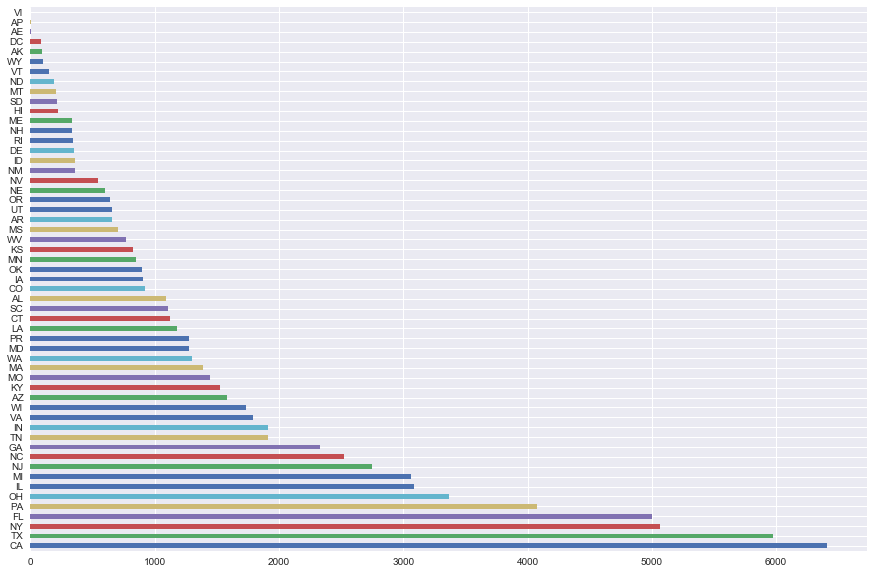

In [25]:
bar("State")

In [26]:
data1["Call Attempts"].value_counts()

3    13039
0    12971
2    12966
1    12907
5    12889
4    12869
Name: Call Attempts, dtype: int64

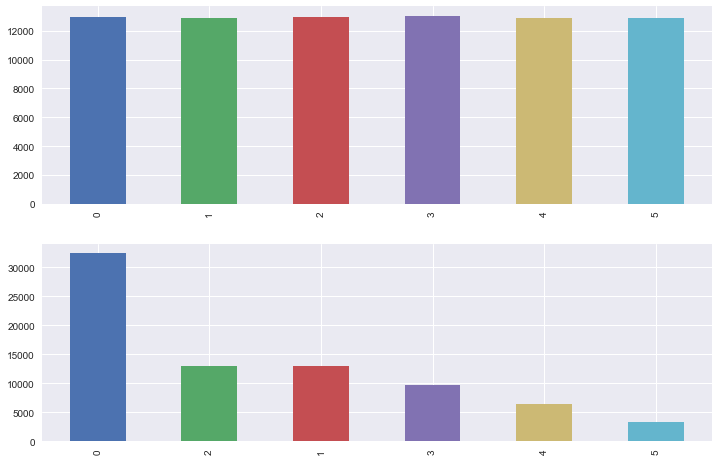

In [27]:
fig, axarr = plt.subplots(2, 1, figsize=(12, 8))

data1["Call Attempts"].value_counts().sort_index().plot.bar(
    ax=axarr[0]
)

data1["Calls Successfully Completed"].value_counts().head(20).plot.bar(
    ax=axarr[1]
)

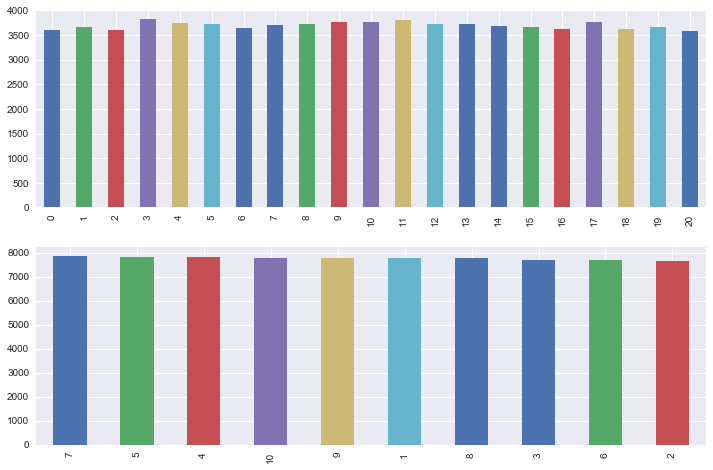

In [28]:
fig, axarr = plt.subplots(2, 1, figsize=(12, 8))


data1["Emails Sent"].value_counts().sort_index().plot.bar(
    ax=axarr[0]
)

data1["Faxes Sent"].value_counts().head(20).plot.bar(
    ax=axarr[1]
)

In [29]:
data1.columns=['Customer ID', 'Title', 'Specialty_Code', 'Specialty_Description',
       'State', 'Region', 'Call_Attempts', 'Calls_Successfully_Completed',
       'Emails_Sent', 'Emails_Opened', 'Faxes_Sent',
       'Brand_1_Sales_(Company_Brand)', 'Brand_2_Sales_(Competitor_Brand)',
       'Total_Branded_Market_Sales',
       'Total_Market_(Branded+Unbranded)_Sales']

In [30]:
data1

,Customer ID,Title,Specialty_Code,Specialty_Description,State,Region,Call_Attempts,Calls_Successfully_Completed,Emails_Sent,Emails_Opened,Faxes_Sent,Brand_1_Sales_(Company_Brand),Brand_2_Sales_(Competitor_Brand),Total_Branded_Market_Sales,Total_Market_(Branded+Unbranded)_Sales
0,IND000001,MD,FM,FAMILY MEDICINE,SC,South Region,1,0,13,6,8,8.0,NaN,27,131
1,IND000002,MD,CD,CARDIOVASCULAR DISEASES,SC,South Region,1,0,15,8,6,3.0,NaN,40,56
2,IND000003,MD,IM,INTERNAL MEDICINE,AL,South Region,2,1,4,2,6,7.0,NaN,27,161
3,IND000004,MD,FM,FAMILY MEDICINE,AL,South Region,0,0,11,9,8,9.0,NaN,39,180
4,IND000005,MD,CD,CARDIOVASCULAR DISEASES,AL,South Region,5,5,0,0,9,4.0,NaN,14,44
5,IND000006,MD,END,ENDOCRINOLOGY,AL,South Region,0,0,8,1,9,2.0,NaN,9,36
6,IND000007,MD,IM,INTERNAL MEDICINE,TN,South Region,2,1,16,9,3,6.0,2.0,26,298
7,IND000008,MD,FM,FAMILY MEDICINE,TX,South Region,2,0,1,0,9,1.0,2.0,29,31
8,IND000009,MD,FM,FAMILY MEDICINE,LA,South Region,4,2,4,3,10,11.0,NaN,38,217
9,IND000010,MD,IM,INTERNAL MEDICINE,AL,South Region,3,2,18,9,6,7.0,3.0,49,227


In [31]:
# checking if there any significance difference between total branded market sales and following features

In [32]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
 
mod = ols('Total_Branded_Market_Sales ~ Call_Attempts',
                data=data1).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=2)
print (aov_table)

                     sum_sq       df          F        PR(>F)
Call_Attempts  2.043016e+04      1.0  88.116929  6.329385e-21
Residual       1.800083e+07  77639.0        NaN           NaN


In [33]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
 
mod = ols('Total_Branded_Market_Sales ~ Calls_Successfully_Completed',
                data=data1).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=2)
print (aov_table)

                                    sum_sq       df           F        PR(>F)
Calls_Successfully_Completed  5.394225e+04      1.0  233.091187  1.505576e-52
Residual                      1.796731e+07  77639.0         NaN           NaN


In [34]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
 
mod = ols('Total_Branded_Market_Sales ~ Emails_Sent',
                data=data1).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=2)
print (aov_table)

                   sum_sq       df           F        PR(>F)
Emails_Sent  5.317261e+04      1.0  229.755632  7.997436e-52
Residual     1.796808e+07  77639.0         NaN           NaN


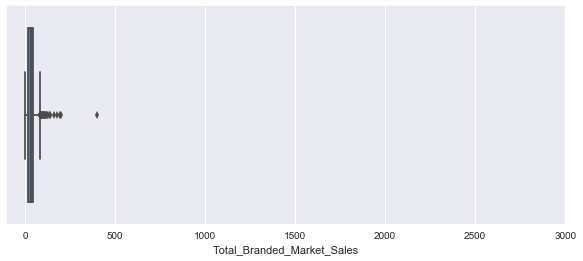

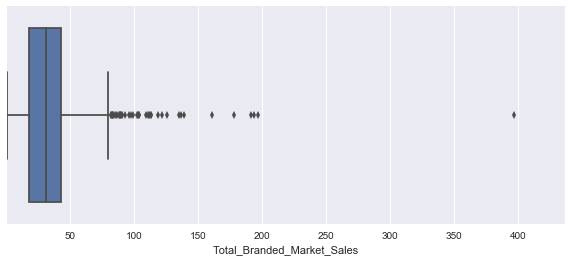

In [35]:
plt.figure(figsize=(10,4))
plt.xlim(-100, 3000)
sns.boxplot(x=data1.Total_Branded_Market_Sales)

plt.figure(figsize=(10,4))
plt.xlim(data1.Total_Branded_Market_Sales.min(), data1.Total_Branded_Market_Sales.max()*1.1)
sns.boxplot(x=data1.Total_Branded_Market_Sales)

# 3. DATA analysing 

In [36]:
data1.head(4)

,Customer ID,Title,Specialty_Code,Specialty_Description,State,Region,Call_Attempts,Calls_Successfully_Completed,Emails_Sent,Emails_Opened,Faxes_Sent,Brand_1_Sales_(Company_Brand),Brand_2_Sales_(Competitor_Brand),Total_Branded_Market_Sales,Total_Market_(Branded+Unbranded)_Sales
0,IND000001,MD,FM,FAMILY MEDICINE,SC,South Region,1,0,13,6,8,8.0,NaN,27,131
1,IND000002,MD,CD,CARDIOVASCULAR DISEASES,SC,South Region,1,0,15,8,6,3.0,NaN,40,56
2,IND000003,MD,IM,INTERNAL MEDICINE,AL,South Region,2,1,4,2,6,7.0,NaN,27,161
3,IND000004,MD,FM,FAMILY MEDICINE,AL,South Region,0,0,11,9,8,9.0,NaN,39,180


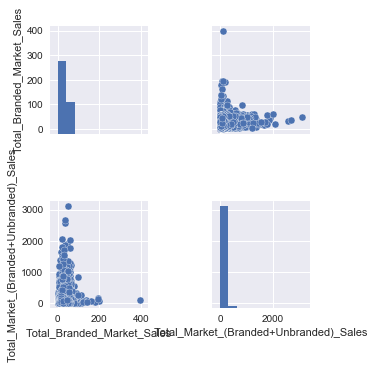

In [37]:
sns.pairplot(data1[['Total_Branded_Market_Sales','Total_Market_(Branded+Unbranded)_Sales']])

In [38]:
data1.columns

Index(['Customer ID', 'Title', 'Specialty_Code', 'Specialty_Description',
       'State', 'Region', 'Call_Attempts', 'Calls_Successfully_Completed',
       'Emails_Sent', 'Emails_Opened', 'Faxes_Sent',
       'Brand_1_Sales_(Company_Brand)', 'Brand_2_Sales_(Competitor_Brand)',
       'Total_Branded_Market_Sales', 'Total_Market_(Branded+Unbranded)_Sales'],
      dtype='object')

In [39]:
data1.groupby("Region")["State"].value_counts()

Region            State
Midwest Region    OH       3369
                  IL       3089
                  MI       3065
                  IN       1911
                  WI       1732
                  MO       1445
                  IA        909
                  MN        851
                  KS        826
                  NE        597
                  SD        214
                  ND        193
Northeast Region  NY       5065
                  PA       4076
                  NJ       2747
                  MA       1389
                  CT       1123
                  RI        343
                  NH        338
                  ME        337
                  VT        148
South Region      TX       5971
                  FL       5005
                  NC       2526
                  GA       2334
                  TN       1914
                  VA       1791
                  KY       1526
                  MD       1279
                  LA       1178
                

# 4.DATA Modeling

In [40]:
df=data1.iloc[:,1:12]

In [41]:
df.head()

,Title,Specialty_Code,Specialty_Description,State,Region,Call_Attempts,Calls_Successfully_Completed,Emails_Sent,Emails_Opened,Faxes_Sent,Brand_1_Sales_(Company_Brand)
0,MD,FM,FAMILY MEDICINE,SC,South Region,1,0,13,6,8,8.0
1,MD,CD,CARDIOVASCULAR DISEASES,SC,South Region,1,0,15,8,6,3.0
2,MD,IM,INTERNAL MEDICINE,AL,South Region,2,1,4,2,6,7.0
3,MD,FM,FAMILY MEDICINE,AL,South Region,0,0,11,9,8,9.0
4,MD,CD,CARDIOVASCULAR DISEASES,AL,South Region,5,5,0,0,9,4.0


In [42]:
df=df.drop(labels="Specialty_Description",axis=1)

In [43]:
for feature in df.columns: # Loop through all columns in the dataframe
    if df[feature].dtype == 'object': # Only apply for columns with categorical strings
        df[feature] = pd.Categorical(df[feature]).codes

In [44]:
df.head()

,Title,Specialty_Code,State,Region,Call_Attempts,Calls_Successfully_Completed,Emails_Sent,Emails_Opened,Faxes_Sent,Brand_1_Sales_(Company_Brand)
0,26,33,43,2,1,0,13,6,8,8.0
1,26,15,43,2,1,0,15,8,6,3.0
2,26,61,2,2,2,1,4,2,6,7.0
3,26,33,2,2,0,0,11,9,8,9.0
4,26,15,2,2,5,5,0,0,9,4.0


In [45]:
#missing value treat ment for brand1 sales
df["Brand_1_Sales_(Company_Brand)"].fillna(df.groupby("Title")["Brand_1_Sales_(Company_Brand)"].transform("median"), inplace=True)


In [46]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,0:9],df["Brand_1_Sales_(Company_Brand)"], test_size=0.2, random_state=0)

In [47]:

from sklearn.linear_model import LinearRegression

In [48]:
model = LinearRegression()

In [50]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [52]:
from sklearn import metrics

In [55]:
print("R^2:",model.score(X_train,y_train))
predictivebalance = model.predict(X_train)
mse = metrics.mean_squared_error(predictivebalance,y_train)#10-rmse,10+rmse
rmse = np.sqrt(mse)#+-3.24 pedictive sales-rmse+predictive sales
print("MSE:",mse)


R^2: 0.3695251464957213
MSE: 4.558426807306014


In [56]:
rmse

2.135047261141077

In [62]:
def AdjRsquare(model,x,y):
    Rsquare = model.score(x,y)
    NoData = len(y)
    p = x.shape[1]
    tempRsquare = 1-(1-Rsquare)*(NoData-1)/(NoData-p-1)
    return tempRsquare

In [64]:
AdjRsquare(model,X_train,y_train)

0.3694337762712271

In [65]:
AdjRsquare(model,X_test,y_test)

0.3746245626750392

In [68]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50, random_state=1)
gbcl = gbcl.fit(X_train, y_train)

In [69]:
from sklearn.metrics import accuracy_score
predicted_labels = gbcl.predict(X_test)
gbcl.score(X_test,y_test)

0.47903921694893425

In [70]:
from sklearn.ensemble import RandomForestRegressor
model_full_rf = RandomForestRegressor(n_estimators=200, random_state=123, n_jobs=-1)
model_full_rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
           oob_score=False, random_state=123, verbose=0, warm_start=False)

In [71]:
model_full_rf.score(X_test,y_test)

0.4058253913882703

# The End